In [22]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv(r'D:\data\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
data=pd.DataFrame(data=df)

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

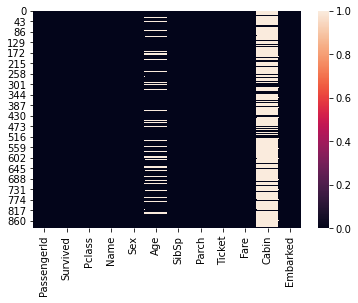

In [30]:
sns.heatmap(data.isnull())

In [31]:
data.drop(['PassengerId', 'Name','Ticket', 'Cabin'],axis=1,inplace=True)

In [32]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


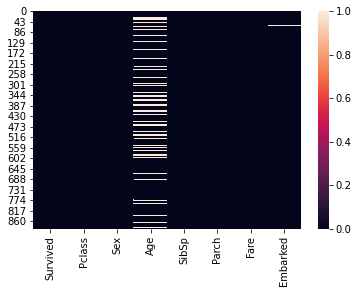

In [33]:
sns.heatmap(data.isnull())

In [85]:
from sklearn.impute import SimpleImputer

In [35]:
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Embarked']=imp.fit_transform(data['Embarked'].values.reshape(-1,1))
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [36]:
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
data['Age']=imp.fit_transform(data['Age'].values.reshape(-1,1))
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


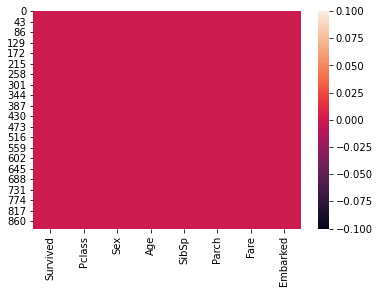

In [37]:
sns.heatmap(data.isnull())

In [38]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [39]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
data.shape

(891, 8)

Survived       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Pclass      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
SibSp       AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Parch             AxesSubplot(0.125,0.125;0.168478x0.343182)
Fare           AxesSubplot(0.327174,0.125;0.168478x0.343182)
dtype: object

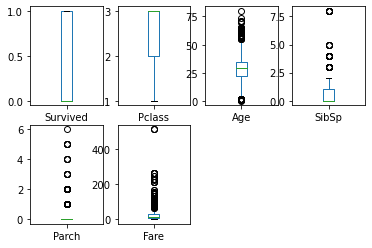

In [41]:
data.plot(kind='box',subplots=True,layout=(2,4))

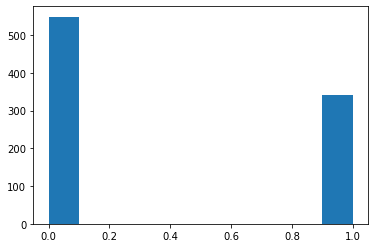

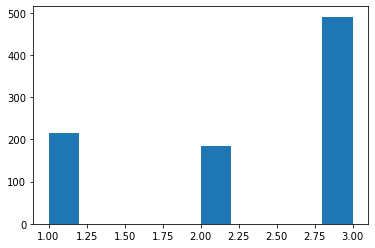

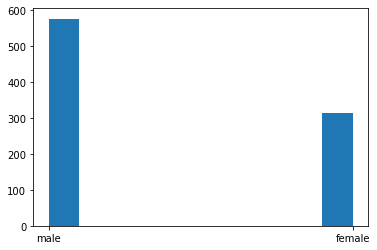

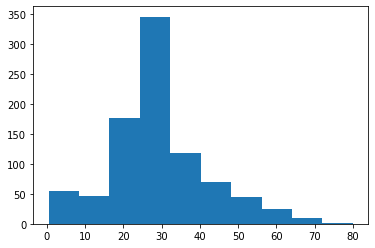

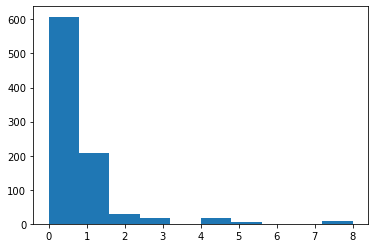

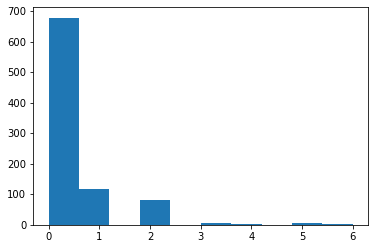

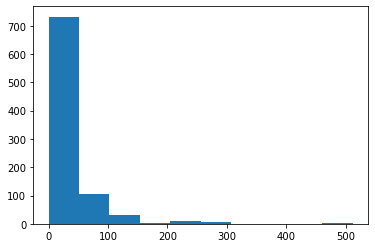

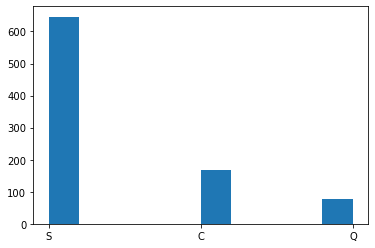

In [42]:
for i in data.columns:
    plt.figure()
    plt.hist(data[i])

In [43]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


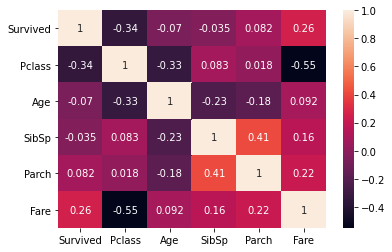

In [44]:
sns.heatmap(data.corr(),annot=True)

In [45]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [46]:
# Import label encoder 
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()   
data['Embarked']= label_encoder.fit_transform(data['Embarked']) 
data['Embarked'].unique() 

array([2, 0, 1])

In [47]:
label_encoder = preprocessing.LabelEncoder()   
data['Sex']= label_encoder.fit_transform(data['Sex']) 
data['Sex'].unique() 

array([1, 0])

In [48]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [49]:
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(data))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [51]:
thresold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [52]:
Data=data[(z<3).all(axis=1)]

In [53]:
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [54]:
data.shape

(891, 8)

In [55]:
Data.shape

(820, 8)

In [56]:
x=Data.iloc[:,1:8]

In [57]:
y=Data['Survived']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)
lg=LogisticRegression()
lg.fit(x_train,y_train) 
pred=lg.predict(x_test)

In [59]:
lg.score(x_train,y_train)

0.7856025039123631

In [60]:
accuracy_score(y_test,pred)

0.8232044198895028

In [61]:
print(confusion_matrix(y_test,pred))

[[101  16]
 [ 16  48]]


In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.75      0.75      0.75        64

    accuracy                           0.82       181
   macro avg       0.81      0.81      0.81       181
weighted avg       0.82      0.82      0.82       181



In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gnb=GaussianNB()from sklearn.naive_bayes import GaussianNB
gnb.fit(x_train,y_train)

GaussianNB()

In [65]:
predgnb=gnb.predict(x_test)

In [66]:
gnb.score(x_train,y_train)

0.7793427230046949

In [67]:
print('Accuracy score:',accuracy_score(y_test,predgnb)) 
print(confusion_matrix(y_test,predgnb))
print('CLassification report:',classification_report(y_test,predgnb))

Accuracy score: 0.8011049723756906
[[95 22]
 [14 50]]
CLassification report:               precision    recall  f1-score   support

           0       0.87      0.81      0.84       117
           1       0.69      0.78      0.74        64

    accuracy                           0.80       181
   macro avg       0.78      0.80      0.79       181
weighted avg       0.81      0.80      0.80       181



In [68]:
from sklearn.svm import SVC

In [69]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [70]:
predsvc=gnb.predict(x_test)

In [71]:
svc.score(x_train,y_train)

0.6838810641627543

In [72]:
print('Accuracy score:',accuracy_score(y_test,predsvc)) 
print(confusion_matrix(y_test,predsvc))
print('CLassification report:',classification_report(y_test,predsvc))

Accuracy score: 0.8011049723756906
[[95 22]
 [14 50]]
CLassification report:               precision    recall  f1-score   support

           0       0.87      0.81      0.84       117
           1       0.69      0.78      0.74        64

    accuracy                           0.80       181
   macro avg       0.78      0.80      0.79       181
weighted avg       0.81      0.80      0.80       181



In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn=KNeighborsClassifier(n_neighbors=5)

In [75]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
predknn=gnb.predict(x_test)

In [77]:
knn.score(x_train,y_train)

0.7824726134585289

In [78]:
print('Accuracy score:',accuracy_score(y_test,predknn)) 
print(confusion_matrix(y_test,predknn))
print('CLassification report:',classification_report(y_test,predknn))

Accuracy score: 0.8011049723756906
[[95 22]
 [14 50]]
CLassification report:               precision    recall  f1-score   support

           0       0.87      0.81      0.84       117
           1       0.69      0.78      0.74        64

    accuracy                           0.80       181
   macro avg       0.78      0.80      0.79       181
weighted avg       0.81      0.80      0.80       181



In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
pred=dtc.predict(x_test)

In [82]:
dtc.score(x_train,y_train)

0.9780907668231612

In [83]:
print('Accuracy score:',accuracy_score(y_test,pred)) 
print(confusion_matrix(y_test,pred))
print('CLassification report:',classification_report(y_test,pred))

Accuracy score: 0.8066298342541437
[[98 19]
 [16 48]]
CLassification report:               precision    recall  f1-score   support

           0       0.86      0.84      0.85       117
           1       0.72      0.75      0.73        64

    accuracy                           0.81       181
   macro avg       0.79      0.79      0.79       181
weighted avg       0.81      0.81      0.81       181



In [86]:
import joblib

In [87]:
joblib.dump(lg,'titanic_dataset.pkl')

['titanic_dataset.pkl']